# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
# Libraries for data preparation and model building
PARAMETER_CONSTANT = 10

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
from sklearn.metrics import r2_score
# Setting global constants to ensure notebook results are reproducible


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data

df = pd.read_csv('df_train.csv', index_col=[0])

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# look at data statistics

# OUTLIERS
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [6]:
df.shape

(8763, 48)

In [7]:
pd.set_option('display.max_columns', 50)

In [8]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [9]:
df.isna().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [10]:
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean())

In [11]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [12]:
# FIND DUPLICATES

df.duplicated().sum()

0

In [13]:
# CHANGE STR COLUMNS TO NUMERIC DATATYPE

In [14]:
# REMOVING STRINGS

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str[6:]

In [15]:
# CHANGE DATATYPE TO FLOAT
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(float)

In [16]:
df['Seville_pressure'] = df['Seville_pressure'].str[2:]

In [17]:
df['Seville_pressure'] = df['Seville_pressure'].astype(float)

In [18]:
# REMOVING THE TIME COLUMN

df.drop(['time'], axis=1, inplace= True)

In [19]:
# SORTING THE HEADERS SO THAT WE CAN SEE DATA RELATING TO THE SAME CITY AT A GLANCE

df.sort_index(axis=1, inplace= True)

In [20]:
df[['Barcelona_weather_id', 'Bilbao_weather_id', 'Madrid_weather_id', 'Seville_weather_id']]

,Barcelona_weather_id,Bilbao_weather_id,Madrid_weather_id,Seville_weather_id
0,800.0,800.000000,800.000000,800.000000
1,800.0,800.000000,800.000000,800.000000
2,800.0,800.000000,800.000000,800.000000
3,800.0,800.000000,800.000000,800.000000
4,800.0,800.000000,800.000000,800.000000
...,...,...,...,...
8758,801.0,802.333333,727.666667,769.333333
8759,801.0,801.333333,762.000000,803.000000
8760,801.0,601.000000,702.333333,801.666667
8761,800.0,634.166667,500.000000,802.333333


In [21]:
### deleting duplicate columns 
'''df.drop(['Barcelona_temp_max'], axis = 1, inplace= True)
df.drop(['Barcelona_temp_min'], axis = 1, inplace= True)
df.drop(['Bilbao_temp_max'],axis = 1, inplace= True)
df.drop(['Bilbao_temp_min'], axis = 1, inplace= True)
df.drop(['Madrid_temp_max'], axis = 1, inplace= True)
df.drop(['Madrid_temp_min'], axis = 1, inplace= True)
df.drop(['Seville_temp_max'], axis = 1, inplace= True)
df.drop(['Seville_temp_min'], axis = 1, inplace= True)
df.drop(['Valencia_temp_max'], axis = 1, inplace= True)
df.drop(['Valencia_temp_min'], axis = 1, inplace= True)'''

df.drop(['Barcelona_weather_id'], axis = 1, inplace= True)
df.drop(['Bilbao_weather_id'], axis = 1, inplace= True)
df.drop(['Madrid_weather_id'], axis = 1, inplace= True)
df.drop(['Seville_weather_id'], axis = 1, inplace= True)


In [22]:
df

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.000000,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,223.333333,1.000000,0.000000,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,0.666667,0.000000,74.333333,25.0,0.0,0.0,274.254667,274.254667,274.254667,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,5.0,0.666667,6715.666667
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.000000,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,221.000000,1.000000,0.000000,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,0.333333,0.000000,78.333333,25.0,0.0,0.0,274.945000,274.945000,274.945000,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,10.0,1.666667,4171.666667
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.000000,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,214.333333,1.000000,0.000000,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,1.000000,0.000000,71.333333,25.0,0.0,0.0,278.792000,278.792000,278.792000,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,9.0,1.000000,4274.666667
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.000000,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,199.666667,1.000000,0.000000,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,1.000000,0.000000,65.333333,25.0,0.0,0.0,285.394000,285.394000,285.394000,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,8.0,1.000000,5075.666667
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.000000,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,185.000000,0.333333,0.000000,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,1.000000,0.000000,59.000000,25.0,0.0,0.0,285.513719,285.513719,285.513719,3.000000,58.333333,1012.051407,0.0,283.015115,283.015115,283.015115,7.0,1.000000,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1021.000000,0.0,0.0,281.276667,282.150000,280.483333,83.666667,1.666667,56.666667,1017.666667,0.0,0.0,287.573333,290.150000,285.150000,226.666667,4.333333,45.000000,95.666667,1024.000000,0.0,279.686667,280.816667,278.483333,1.000000,80.000000,89.000000,23.0,0.0,0.0,285.076667,285.483333,284.816667,1.000000,71.333333,1012.051407,0.0,282.483333,282.483333,282.483333,6.0,2.666667,-28.333333
8759,1019.000000,0.0,0.0,287.483333,287.816667,287.150000,213.333333,3.000000,26.666667,1015.333333,0.0,0.0,288.616667,291.150000,286.483333,220.000000,8.000000,85.000000,85.000000,1023.666667,0.0,282.400000,283.483333,280.150000,5.000000,75.000000,82.000000,23.0,0.0,0.0,287.673333,288.483333,287.150000,1.666667,40.333333,1021.000000,0.0,291.816667,291.816667,291.816667,6.0,2.000000,2266.666667
8760,1015.666667,0.0,0.0,289.816667,290.483333,289.150000,256.666667,5.333333,63.333333,1017.333333,0.4,0.0,285.330000,286.816667,283.816667,283.333333,8.333333,85.000000,71.000000,1021.666667,0.1,283.956667,285.150000,281.150000,6.333333,33.333333,67.666667,22.0,0.0,0.0,290.070000,291.483333,289.150000,3.666667,44.666667,1009.666667,0.0,290.70

In [23]:
df.kurtosis()

Barcelona_pressure      3687.564230
Barcelona_rain_1h        101.578931
Barcelona_rain_3h        187.800460
Barcelona_temp            -0.696555
Barcelona_temp_max        -0.728757
Barcelona_temp_min        -0.474890
Barcelona_wind_deg        -0.959160
Barcelona_wind_speed       1.493635
Bilbao_clouds_all         -1.533417
Bilbao_pressure            1.825323
Bilbao_rain_1h            32.904656
Bilbao_snow_3h           806.128471
Bilbao_temp               -0.086363
Bilbao_temp_max            0.283366
Bilbao_temp_min           -0.230342
Bilbao_wind_deg           -1.083530
Bilbao_wind_speed          3.631565
Madrid_clouds_all          0.142079
Madrid_humidity           -1.167537
Madrid_pressure            2.216199
Madrid_rain_1h            76.584491
Madrid_temp               -0.612299
Madrid_temp_max           -0.662861
Madrid_temp_min           -0.666646
Madrid_wind_speed          2.036462
Seville_clouds_all         2.155921
Seville_humidity          -1.017983
Seville_pressure          -1

In [24]:
outliers = df[['Barcelona_pressure',
               'Barcelona_rain_1h',
               'Barcelona_rain_3h', 
              'Bilbao_rain_1h', 
              'Bilbao_snow_3h', 
              'Madrid_rain_1h',
              'Seville_rain_1h',
              'Seville_rain_3h',
              'Valencia_snow_3h',
             'Valencia_wind_speed']]

In [25]:
outliers

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Bilbao_rain_1h,Bilbao_snow_3h,Madrid_rain_1h,Seville_rain_1h,Seville_rain_3h,Valencia_snow_3h,Valencia_wind_speed
0,1036.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
1,1037.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666667
2,1038.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
3,1037.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
4,1035.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
8758,1021.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667
8759,1019.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
8760,1015.666667,0.0,0.0,0.4,0.0,0.1,0.0,0.0,0.0,7.333333
8761,1015.000000,0.0,0.0,0.2,0.0,0.3,0.0,0.0,0.0,7.333333


In [26]:
## rescaling, normalising and standardizing the data set using standardscaler
for x in ['Barcelona_pressure', 'Barcelona_rain_1h',
               'Barcelona_rain_3h', 
              'Bilbao_rain_1h', 
              'Bilbao_snow_3h', 
              'Madrid_rain_1h',
              'Seville_rain_1h',
              'Seville_rain_3h',
              'Valencia_snow_3h',
             'Valencia_wind_speed']:
    q75,q25 = np.percentile(outliers.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    outliers.loc[outliers[x] < min,x] = np.nan 
    outliers.loc[outliers[x] > max,x] = np.nan

C:\Users\HP\AppData\Local\Temp\ipykernel_11976\640950847.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.loc[outliers[x] < min,x] = np.nan
C:\Users\HP\AppData\Local\Temp\ipykernel_11976\640950847.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.loc[outliers[x] > max,x] = np.nan


In [27]:
outliers

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Bilbao_rain_1h,Bilbao_snow_3h,Madrid_rain_1h,Seville_rain_1h,Seville_rain_3h,Valencia_snow_3h,Valencia_wind_speed
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666667
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
8758,1021.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667
8759,1019.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
8760,1015.666667,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,7.333333
8761,1015.000000,0.0,0.0,0.2,0.0,NaN,0.0,0.0,0.0,7.333333


In [28]:
outliers.kurtosis()

Barcelona_pressure     0.086901
Barcelona_rain_1h      0.000000
Barcelona_rain_3h      0.000000
Bilbao_rain_1h         5.537613
Bilbao_snow_3h         0.000000
Madrid_rain_1h         0.000000
Seville_rain_1h        0.000000
Seville_rain_3h        0.000000
Valencia_snow_3h       0.000000
Valencia_wind_speed    0.317234
dtype: float64

In [29]:
df['Barcelona_pressure'] = outliers['Barcelona_pressure']
df['Barcelona_rain_1h'] = outliers['Barcelona_rain_1h']
df['Barcelona_rain_3h'] = outliers['Barcelona_rain_3h']
df['Bilbao_rain_1h'] = outliers['Bilbao_rain_1h']
df['Bilbao_snow_3h'] = outliers['Bilbao_snow_3h']
df['Madrid_rain_1h'] = outliers['Madrid_rain_1h']
df['Seville_rain_1h'] = outliers['Seville_rain_1h']
df['Seville_rain_3h'] = outliers['Seville_rain_3h']
df['Valencia_snow_3h'] = outliers['Valencia_snow_3h']
df['Valencia_wind_speed'] = outliers['Valencia_wind_speed']

In [30]:
df

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
0,NaN,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.000000,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,223.333333,1.000000,0.000000,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,0.666667,0.000000,74.333333,25.0,0.0,0.0,274.254667,274.254667,274.254667,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,5.0,0.666667,6715.666667
1,NaN,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.000000,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,221.000000,1.000000,0.000000,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,0.333333,0.000000,78.333333,25.0,0.0,0.0,274.945000,274.945000,274.945000,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,10.0,1.666667,4171.666667
2,NaN,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.000000,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,214.333333,1.000000,0.000000,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,1.000000,0.000000,71.333333,25.0,0.0,0.0,278.792000,278.792000,278.792000,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,9.0,1.000000,4274.666667
3,NaN,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.000000,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,199.666667,1.000000,0.000000,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,1.000000,0.000000,65.333333,25.0,0.0,0.0,285.394000,285.394000,285.394000,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,8.0,1.000000,5075.666667
4,NaN,0.0,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.000000,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,185.000000,0.333333,0.000000,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,1.000000,0.000000,59.000000,25.0,0.0,0.0,285.513719,285.513719,285.513719,3.000000,58.333333,1012.051407,0.0,283.015115,283.015115,283.015115,7.0,1.000000,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1021.000000,0.0,0.0,281.276667,282.150000,280.483333,83.666667,1.666667,56.666667,1017.666667,0.0,0.0,287.573333,290.150000,285.150000,226.666667,4.333333,45.000000,95.666667,1024.000000,0.0,279.686667,280.816667,278.483333,1.000000,80.000000,89.000000,23.0,0.0,0.0,285.076667,285.483333,284.816667,1.000000,71.333333,1012.051407,0.0,282.483333,282.483333,282.483333,6.0,2.666667,-28.333333
8759,1019.000000,0.0,0.0,287.483333,287.816667,287.150000,213.333333,3.000000,26.666667,1015.333333,0.0,0.0,288.616667,291.150000,286.483333,220.000000,8.000000,85.000000,85.000000,1023.666667,0.0,282.400000,283.483333,280.150000,5.000000,75.000000,82.000000,23.0,0.0,0.0,287.673333,288.483333,287.150000,1.666667,40.333333,1021.000000,0.0,291.816667,291.816667,291.816667,6.0,2.000000,2266.666667
8760,1015.666667,0.0,0.0,289.816667,290.483333,289.150000,256.666667,5.333333,63.333333,1017.333333,NaN,0.0,285.330000,286.816667,283.816667,283.333333,8.333333,85.000000,71.000000,1021.666667,NaN,283.956667,285.150000,281.150000,6.333333,33.333333,67.666667,22.0,0.0,0.0,290.070000,291.483333,289.150000,3.666667,44.666667,1009.666667,0.0,290.706333,290.706333,290.706333,9.0,7.333333,

In [31]:
df['Barcelona_pressure'] = df['Barcelona_pressure'].fillna(df['Barcelona_pressure'].mean())
df['Barcelona_rain_1h'] = df['Barcelona_rain_1h'].fillna(df['Barcelona_rain_1h'].mean())
df['Barcelona_rain_3h'] = df['Barcelona_rain_3h'].fillna(df['Barcelona_rain_3h'].mean())
df['Bilbao_rain_1h'] = df['Bilbao_rain_1h'].fillna(df['Bilbao_rain_1h'].mean())
df['Bilbao_snow_3h'] = df['Bilbao_snow_3h'].fillna(df['Bilbao_snow_3h'].mean())
df['Madrid_rain_1h'] = df['Madrid_rain_1h'].fillna(df['Madrid_rain_1h'].mean())
df['Seville_rain_1h'] = df['Seville_rain_1h'].fillna(df['Seville_rain_1h'].mean())
df['Seville_rain_3h'] = df['Seville_rain_3h'].fillna(df['Seville_rain_3h'].mean())
df['Valencia_snow_3h'] = df['Valencia_snow_3h'].fillna(df['Valencia_snow_3h'].mean())
df['Valencia_wind_speed'] = df['Valencia_wind_speed'].fillna(df['Valencia_wind_speed'].mean())

In [32]:
df.describe()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
count,8763.000000,8763.0,8763.0,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.0,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.0,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.0,8763.0,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.0,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,1018.259151,0.0,0.0,289.855459,291.157644,288.447422,190.544848,2.870497,43.469132,1017.739549,0.019841,0.0,286.422929,287.966027,285.017973,158.957511,1.850356,19.473392,57.414717,1010.316920,0.0,288.419439,289.540309,287.202203,2.425729,13.714748,62.658793,13.507246,0.0,0.0,293.978903,297.479527,291.633356,2.425045,65.247727,1012.051407,0.0,290.592152,291.337233,289.867648,5.276389,2.283290,10673.857612
std,6.119591,0.0,0.0,6.528111,7.273538,6.102593,89.077337,1.792197,32.551044,10.046124,0.047279,0.0,6.818682,7.105590,6.705672,102.056299,1.695888,28.053660,24.335396,22.198555,0.0,9.346796,9.752047,9.206237,1.850371,24.272482,22.621226,7.237267,0.0,0.0,7.920986,8.875812,8.178220,1.672895,19.262322,8.309001,0.0,7.162274,7.565692,6.907402,2.877642,1.678982,5218.046404
min,1002.000000,0.0,0.0,270.816667,272.150000,269.483333,0.000000,0.000000,0.000000,971.333333,0.000000,0.0,267.483333,269.063000,264.483333,0.000000,0.000000,0.000000,6.333333,927.666667,0.0,264.983333,264.983333,264.983333,0.000000,0.000000,8.333333,1.000000,0.0,0.0,272.063000,272.063000,270.150000,0.000000,10.333333,972.666667,0.0,269.888000,269.888000,269.888000,1.000000,0.000000,-6618.000000
25%,1014.666667,0.0,0.0,284.973443,285.483333,284.150000,118.166667,1.666667,10.000000,1013.000000,0.000000,0.0,281.374167,282.836776,280.085167,73.333333,0.666667,0.000000,36.333333,1012.333333,0.0,281.404281,282.150000,280.299167,1.000000,0.000000,44.333333,7.000000,0.0,0.0,288.282917,291.312750,285.816667,1.000000,51.333333,1012.051407,0.0,285.150000,285.550167,284.783333,3.000000,1.000000,7390.333333
50%,1018.259151,0.0,0.0,289.416667,290.150000,288.150000,200.000000,2.666667,45.000000,1019.000000,0.000000,0.0,286.158333,287.630000,284.816667,147.000000,1.000000,0.000000,58.000000,1017.333333,0.0,287.053333,288.116177,286.083333,2.000000,0.000000,65.666667,14.000000,0.0,0.0,293.323333,297.101667,290.816667,2.000000,67.000000,1013.000000,0.0,290.176667,291.037000,289.550000,5.000000,1.666667,11114.666667
75%,1021.666667,0.0,0.0,294.909000,296.855000,292.966667,260.000000,4.000000,75.000000,1024.000000,0.019841,0.0,291.034167,292.483333,289.816667,234.000000,2.666667,33.333333,78.666667,1022.000000,0.0,295.154667,296.816667,293.884500,3.333333,20.000000,82.000000,20.000000,0.0,0.0,299.620333,304.150000,297.150000,3.333333,81.333333,1017.333333,0.0,296.056667,297.248333,294.820000,8.000000,3.333333,14498.166667
max,1034.000000,0.0,0.0,307.316667,314.076667,304.816667,360.000000,12.666667,100.000000,1042.000000,0.200000,0.0,310.710000,317.966667,309.816667,359.333333,12.666667,100.000000,100.000000,1038.000000,0.0,313.133333,314.483333,310.383333,13.000000,97.333333,100.000000,25.000000,0.0,0.0,314.976667,320.483333,314.816667,11.666667,100.000000,1021.666667,0.0,310.426667,

In [33]:
X = df.drop(['load_shortfall_3h'], axis=1)
y = df['load_shortfall_3h']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state = PARAMETER_CONSTANT)

In [35]:
# define the model 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 1.427024620002562e-24


In [36]:
'''
features = ['Barcelona_pressure',
        'Barcelona_rain_1h',
        'Barcelona_rain_3h',
        'Barcelona_temp',
        'Barcelona_weather_id',
        'Barcelona_wind_deg',
        'Barcelona_wind_speed',
        'Bilbao_clouds_all',
        'Bilbao_pressure',
        'Bilbao_rain_1h',
        'Bilbao_snow_3h',
        'Bilbao_temp',
        'Bilbao_weather_id',
        'Bilbao_wind_deg',
        'Bilbao_wind_speed',
        'Madrid_clouds_all',
        'Madrid_humidity',
        'Madrid_pressure',
        'Madrid_rain_1h',
        'Madrid_temp',
        'Madrid_weather_id',
        'Madrid_wind_speed',
        'Seville_clouds_all',
        'Seville_humidity',
        'Seville_pressure',
        'Seville_rain_1h',
        'Seville_rain_3h',
        'Seville_temp',
        'Seville_weather_id',
        'Seville_wind_speed',
        'Valencia_humidity',
        'Valencia_pressure',
        'Valencia_snow_3h',
        'Valencia_temp',
        'Valencia_wind_deg',
        'Valencia_wind_speed',
        'load_shortfall_3h'] # create a list of all numerical features

SaledX[features].hist(figsize=(18,18)); 
'''

"\nfeatures = ['Barcelona_pressure',\n        'Barcelona_rain_1h',\n        'Barcelona_rain_3h',\n        'Barcelona_temp',\n        'Barcelona_weather_id',\n        'Barcelona_wind_deg',\n        'Barcelona_wind_speed',\n        'Bilbao_clouds_all',\n        'Bilbao_pressure',\n        'Bilbao_rain_1h',\n        'Bilbao_snow_3h',\n        'Bilbao_temp',\n        'Bilbao_weather_id',\n        'Bilbao_wind_deg',\n        'Bilbao_wind_speed',\n        'Madrid_clouds_all',\n        'Madrid_humidity',\n        'Madrid_pressure',\n        'Madrid_rain_1h',\n        'Madrid_temp',\n        'Madrid_weather_id',\n        'Madrid_wind_speed',\n        'Seville_clouds_all',\n        'Seville_humidity',\n        'Seville_pressure',\n        'Seville_rain_1h',\n        'Seville_rain_3h',\n        'Seville_temp',\n        'Seville_weather_id',\n        'Seville_wind_speed',\n        'Valencia_humidity',\n        'Valencia_pressure',\n        'Valencia_snow_3h',\n        'Valencia_temp',\n        'V

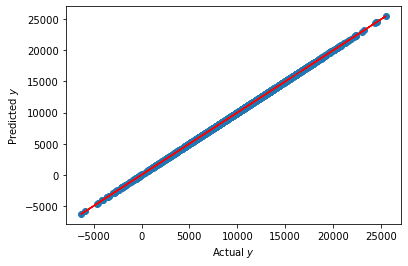

In [37]:
plt.scatter(y_test,y_pred) 
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

In [38]:
# plot relevant feature interactions

In [39]:
# evaluate correlation

In [40]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [41]:
# remove missing values/ features

In [42]:
# TRAIN_TEST_SPLIT

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = PARAMETER_CONSTANT)

ValueError: Found input variables with inconsistent numbers of samples: [19, 8763]

In [ ]:
# NORMALIZING THE DATA

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic